In [1]:
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

In [2]:
def scrape_google_scholar(url):
    # Send a GET request to the URL
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find the div containing the results count
        results_div = soup.find('div', {'id': 'gs_ab_md'})
        
        if results_div:
            # Extract the text containing the number of results
            results_text = results_div.text
            
            # Use regex to find the number in the string
            match = re.search(r'About ([\d,]+) results', results_text)
            
            if match:
                # Extract and return the number
                return match.group(1)
            else:
                return "Number of results not found in the expected format."
        else:
            return "Results count div not found on the page."
    else:
        return f"Failed to retrieve the page. Status code: {response.status_code}"

# URL to scrape


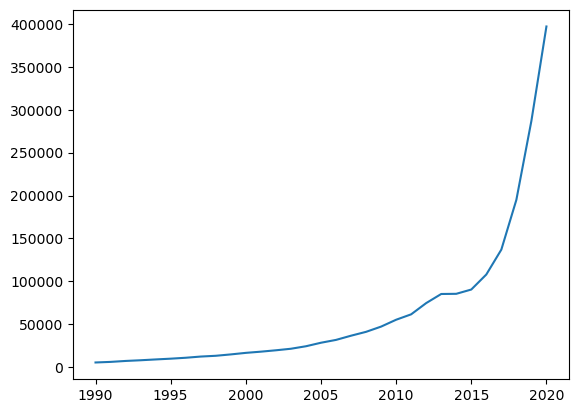

In [3]:
ml_kw = 'Machine+Learning+OR+Neural+Networks+OR+deep+learning'
sim_kw = 'simulation+OR+Physics'
numbers = []
for i in range(1990,2021):
    url = "https://scholar.google.com/scholar?q=%28"+\
                ml_kw+"%29+AND+%28"+sim_kw+\
                    f"%29&hl=en&as_sdt=0%2C5&as_ylo={i}&as_yhi={i}"
    num = scrape_google_scholar(url)
    numbers.append(num)
plt.plot([i for i in range(1990,2021)],[1000*float(n.replace(',','.')) for n in numbers])

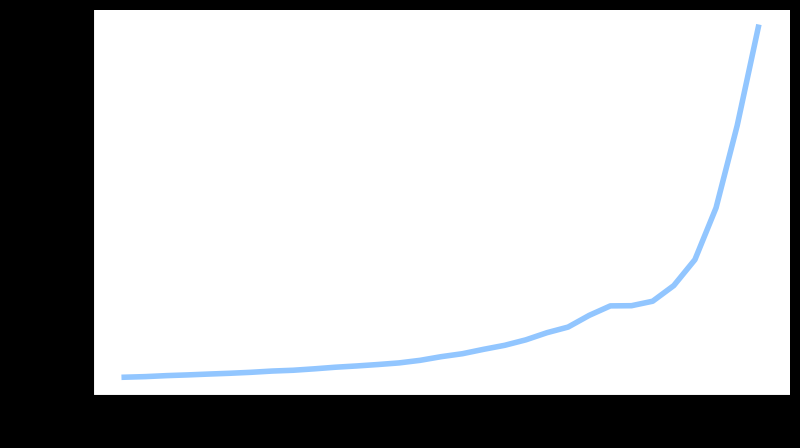

In [8]:
plt.figure(figsize=(9,5))
plt.style.use('default')
plt.style.use('seaborn-v0_8-pastel')
plt.plot([i for i in range(1990,2021)],[1000*float(n.replace(',','.')) for n in numbers],lw=4)
ax =plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Year')
plt.ylabel('Papers')
plt.savefig('PhysSimPaper_white.png',dpi=300,transparent=True)

In [5]:
len(numbers)

34